In [1]:
### Calculate initial rates for each tube

import numpy as np

################################################################################
### parameters to get extinction coeff for NPA at give pH value
################################################################################

### List of Lane Names
lane_name_list = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
### List of the enzyme concentrations in each lane (nanomolar)
Max_E_conc = 1   ### nanomolar
E_conc_list = [0, 0, 0, 1, 1, 1, 1/2, 1/2, 1/2, 1/4, 1/4, 1/4]  # dilutions

### List of Row Names
row_name_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
### List of the NPA conc in the eight wells of each lane (mM)
S_conc_list = [0.01, 0.02, 0.03, 0.04, 0.06, 0.1, 0.25, 0.5]

### Substrate information
pH = 7.0
e_NPA = 18300  ### extinction coeff for NPA anion
pKa_NPA = 7.15 ### pKa for p-nitrophenol


################################################################################
### Calculated Values from the above lists
################################################################################


Ka = 10 ** -pKa_NPA   ### extinction coeff for NPA at given pH
H = 10 ** -pH
e_NPA = e_NPA * (Ka / (H + Ka))

E_conc_list = np.array(E_conc_list)  * Max_E_conc
E_conc_list = E_conc_list * 1E-9 * 2 ### convert from nM to M

S_conc_list = np.array(S_conc_list)
S_conc_list = S_conc_list * 1E-3       ### convert from mM to M


slope = 0.024 +/- 1.74e-05


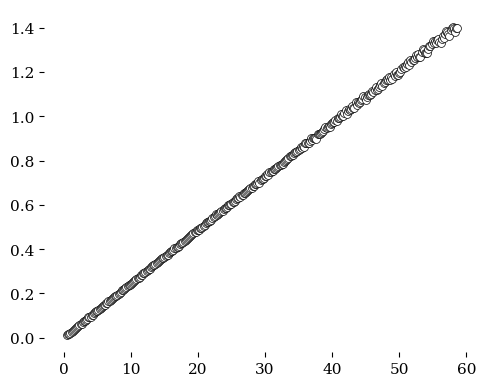

In [2]:
### Plot initial rates for a lane

import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

lane_name = "10"
points_used = 350
def linear_function(x, slope, intercept):
    return slope*x + intercept

plt.ioff()           ### switch off interactive display of plots. plt.show() needed to display a plot now
plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

data_name = "data1/data"
data_file_extention = ".csv"

plot_file = "plot_initial_rate"
plot_file_extention = ".pdf"

color_list = ['white','lightgray','gray']
lane_name_list = [lane_name]
for lane_name in lane_name_list:
    n = 0
    slope_list = []
    slope_stderr_list = []
    int_list = []
    int_stderr_list = []

    row_name_list = ["H"]

    for row_name in row_name_list:
        in_file_name = data_name + "_" + lane_name + "_" + row_name + ".csv"
        df = pd.read_csv(in_file_name)

        x = df["time"][0:points_used] 
        y = df["abs"][0:points_used]

        param,cov = curve_fit(linear_function, x,y)
        slope, intercept = param

        perr = np.sqrt(np.diag(cov))
        slope_stderr, int_stderr = perr
        print(f"slope = {slope:0.3g} +/- {slope_stderr:0.3g}")
       
        slope_list.append(slope)
        slope_stderr_list.append(slope_stderr)
        int_list.append(intercept)
        int_stderr_list.append(int_stderr)

        x_fit = np.linspace(0,np.max(x),10)
        ax.plot(x_fit, linear_function(x_fit, slope, intercept), 
                linestyle = '-', 
                linewidth='0.5', 
                color = 'black', 
                zorder = 0)
        ax.scatter(x, y, 
                marker='o', 
                color=color_list[n%3], 
                edgecolors = 'black',
                linewidths = 0.5, 
                s=32, 
                zorder = 2)
        ax.scatter(x, y, 
                marker='o', 
                color='white', 
                edgecolors = None,
                linewidths = 0.5, 
                s=64, 
                zorder = 1)
        n += 1
    conc_list = S_conc_list

    dict = {"S conc":conc_list,
            "slope":slope_list,
            "slope stderr":slope_stderr_list,
            "int": int_list,
            "int stderr":int_stderr_list}
#    data_for_lane = pd.DataFrame(dict)
    
#    data_for_lane.to_csv("data1/init_rates_lane_"+lane_name+".csv")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(plot_file+"_"+lane_name+".pdf")     ### export the plot as this
plt.show()

slope = 0.0453 +/- 0.000178


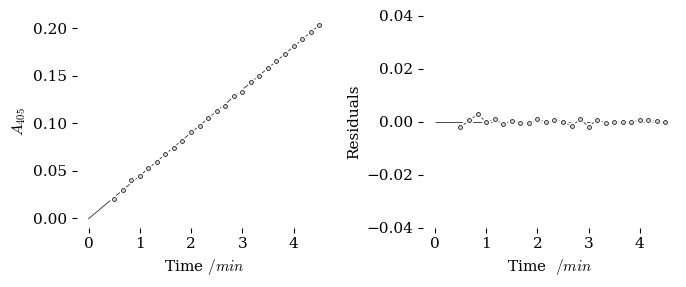

In [3]:
### Analysis of a single cell with slope and differentials

##########################################
### Change these settings
##########################################

lane_name = "7"
row_name = "H"
Fraction_time_span = 0.07

data_name = "data1/data"
plot_file = "plot1/Cell_w_residuals"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

def linear_function(x, slope, int):
    return slope*x + int

def linear_function_int0(x, slope):
    return slope*x


plt.ioff()           ### switch off interactive display of plots. plt.show() needed to display a plot now
plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))  

in_file_name = data_name + "_" + lane_name + "_" + row_name + ".csv"
df = pd.read_csv(in_file_name)

points_used = int(Fraction_time_span * len(df["time"]))

x = df["time"][0:points_used]
y = df["abs"][0:points_used]

param,cov = curve_fit(linear_function, x,y)
slope, intercept = param

##param,cov = curve_fit(linear_function_int0, x,y)
##[slope] = param


perr = np.sqrt(np.diag(cov))
slope_stderr, int_stderr = perr
print(f"slope = {slope:0.3g} +/- {slope_stderr:0.3g}")
##print(f"slope = {slope:0.3g}")
x_fit = np.linspace(0,np.max(x),10)

ax[0].plot(x_fit, linear_function(x_fit, slope, intercept), 
        linestyle = '-', 
        linewidth='0.5', 
        color = 'black', 
        zorder = 0)
ax[0].scatter(x, y, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 2)
ax[0].scatter(x, y, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=32, 
        zorder = 1)
ax[0].set(xlabel= r"Time $/min$",  
          ylabel=r"$A_{405}$",
 #         title = "Lane # "+lane_name,
          xlim=[-0.05*np.max(x), None],                  
          ylim=[-0.05*np.max(y), None]      
         )

residuals = y - linear_function(x, slope, intercept)
y = residuals
ax[1].hlines(0, xmin = 0, xmax = np.max(x), 
             colors='black', linestyles='solid', 
             linewidths = 0.5, zorder = 0)
ax[1].plot(x, y, 
        linestyle = '-', 
        linewidth='3', 
        color = 'white', 
        zorder = 1)
ax[1].plot(x, y, 
        linestyle = '-', 
        linewidth='0.5', 
        color = 'black', 
        zorder = 1)
ax[1].scatter(x, y, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 3)
ax[1].scatter(x, y, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=32, 
        zorder = 2)
ax[1].set(xlabel= r"Time  $/min$", 
          ylabel="Residuals",
 #         title = "Lane # "+lane_name,
 #         xlim=[None, None],                  
          ylim=[-.04, +0.04])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(plot_file+"_"+lane_name+"_"+row_name+".pdf")     ### export the plot as this
plt.show()

slope = 0.00543 +/- 4.6e-05
slope = 0.00619 +/- 0.000441


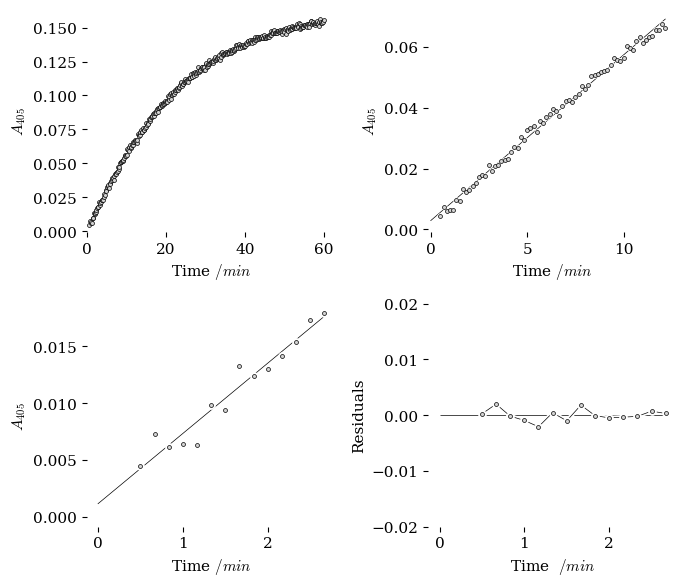

In [5]:
### Analysis of a single cell with slope and differentials

##########################################
### Change these settings
##########################################

lane_name = "10"
row_name = "B"
Fraction_time_span = 0.04

data_name = "data1/data"
plot_file = "plot1/Cell_w_residuals"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

def linear_function(x, slope, int):
    return slope*x + int

def linear_function_int0(x, slope):
    return slope*x


plt.ioff()           ### switch off interactive display of plots. plt.show() needed to display a plot now

plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,6))  

in_file_name = data_name + "_" + lane_name + "_" + row_name + ".csv"
df = pd.read_csv(in_file_name)

points_used = int(Fraction_time_span * len(df["time"]))
points_used2 = int(0.2 * len(df["time"]))


x_all = df["time"]
y_all = df["abs"]

x = x_all[0:points_used]
y = y_all[0:points_used]

x2 = x_all[0:points_used2]
y2 = y_all[0:points_used2]

#########################################################################


ax[0][0].scatter(x_all, y_all, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 2)
ax[0][0].scatter(x_all, y_all, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=32, 
        zorder = 1)
ax[0][0].set(xlabel= r"Time $/min$",  
          ylabel=r"$A_{405}$",
 #         title = "Lane # "+lane_name,
          xlim=[-0.05*np.max(x), None],                  
          ylim=[-0.05*np.max(y), None]      
         )

#########################################################################

param,cov = curve_fit(linear_function, x2,y2)
slope2, intercept2 = param


perr = np.sqrt(np.diag(cov))
slope_stderr2, int_stderr2 = perr
print(f"slope = {slope2:0.3g} +/- {slope_stderr2:0.3g}")

x_fit = np.linspace(0,np.max(x2),10)

ax[0][1].plot(x_fit, linear_function(x_fit, slope2, intercept2), 
        linestyle = '-', 
        linewidth='0.5', 
        color = 'black', 
        zorder = 0)
ax[0][1].scatter(x2, y2, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 2)
ax[0][1].scatter(x2, y2, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=16, 
        zorder = 1)
ax[0][1].set(xlabel= r"Time $/min$",  
          ylabel=r"$A_{405}$",
 #         title = "Lane # "+lane_name,
          xlim=[-0.05*np.max(x), None],                  
          ylim=[-0.05*np.max(y), None]      
         )


#########################################################################

param,cov = curve_fit(linear_function, x,y)
slope, intercept = param


perr = np.sqrt(np.diag(cov))
slope_stderr, int_stderr = perr
print(f"slope = {slope:0.3g} +/- {slope_stderr:0.3g}")

x_fit = np.linspace(0,np.max(x),10)

ax[1][0].plot(x_fit, linear_function(x_fit, slope, intercept), 
        linestyle = '-', 
        linewidth='0.5', 
        color = 'black', 
        zorder = 0)
ax[1][0].scatter(x, y, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 2)
ax[1][0].scatter(x, y, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=32, 
        zorder = 1)
ax[1][0].set(xlabel= r"Time $/min$",  
          ylabel=r"$A_{405}$",
 #         title = "Lane # "+lane_name,
          xlim=[-0.05*np.max(x), None],                  
          ylim=[-0.05*np.max(y), None]      
         )

#########################################################################

#x=x2; y=y2; slope=slope2; intercept=intercept2

residuals = y - linear_function(x, slope, intercept)
y = residuals
ax[1][1].hlines(0, xmin = 0, xmax = np.max(x), 
             colors='black', linestyles='solid', 
             linewidths = 0.5, zorder = 0)
ax[1][1].plot(x, y, 
        linestyle = '-', 
        linewidth='3', 
        color = 'white', 
        zorder = 1)
ax[1][1].plot(x, y, 
        linestyle = '-', 
        linewidth='0.5', 
        color = 'black', 
        zorder = 1)
ax[1][1].scatter(x, y, 
        marker='o', 
        color='lightgray', 
        edgecolors = 'black',
        linewidths = 0.5, 
        s=8, 
        zorder = 3)
ax[1][1].scatter(x, y, 
        marker='o', 
        color='white', 
        edgecolors = None,
        linewidths = 0.5, 
        s=32, 
        zorder = 2)
ax[1][1].set(xlabel= r"Time  $/min$", 
          ylabel="Residuals",
 #         title = "Lane # "+lane_name,
 #         xlim=[None, None],                  
          ylim=[-.02, +0.02]
           )

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(plot_file+"_"+lane_name+"_"+row_name+".pdf")     ### export the plot as this
plt.show()